## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  15.846747   696.802879  0.287935  4.691401  1.637039
1  85.611546   259.152233  0.042740  5.059479  0.065759
2  21.614757   259.165768  0.626996  3.921241  1.445098
3  62.693417  1286.550501  0.673838  7.110563  1.522579
4  73.296260   981.023378  0.387338  8.732483  1.383124


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9766677	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9687193	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9581670	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9477273	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9387300	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9318265	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9217154	total: 60ms	remaining: 8.51s
7:	learn: 0.9109553	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9021207	total: 61.1ms	remaining: 6.73s
9:	learn: 0.8936740	total: 61.6ms	remaining: 6.1s
10:	learn: 0.8857865	total: 62ms	remaining: 5.58s
11:	learn: 0.8783940	total: 62.5ms	remaining: 5.15s
12:	learn: 0.8721162	total: 63ms	remaining: 4.78s
13:	learn: 0.8658784	total: 63.4ms	remaining: 4.47s
14:	learn: 0.8566247	total: 63.9ms	remaining: 4.19s
15:	learn: 0.8486430	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8392840	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8302291	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8225932	total: 65.5ms	remaining: 3.38s

121:	learn: 0.3564057	total: 109ms	remaining: 782ms
122:	learn: 0.3546188	total: 109ms	remaining: 779ms
123:	learn: 0.3522415	total: 110ms	remaining: 774ms
124:	learn: 0.3502861	total: 110ms	remaining: 770ms
125:	learn: 0.3477513	total: 110ms	remaining: 765ms
126:	learn: 0.3451431	total: 111ms	remaining: 761ms
127:	learn: 0.3425161	total: 111ms	remaining: 757ms
128:	learn: 0.3398821	total: 112ms	remaining: 754ms
129:	learn: 0.3372981	total: 112ms	remaining: 750ms
130:	learn: 0.3350026	total: 112ms	remaining: 746ms
131:	learn: 0.3321808	total: 113ms	remaining: 742ms
132:	learn: 0.3301107	total: 113ms	remaining: 738ms
133:	learn: 0.3280868	total: 114ms	remaining: 734ms
134:	learn: 0.3264153	total: 114ms	remaining: 728ms
135:	learn: 0.3247790	total: 114ms	remaining: 724ms
136:	learn: 0.3226079	total: 114ms	remaining: 721ms
137:	learn: 0.3209699	total: 115ms	remaining: 717ms
138:	learn: 0.3188518	total: 115ms	remaining: 714ms
139:	learn: 0.3170210	total: 116ms	remaining: 711ms
140:	learn: 

296:	learn: 0.1473214	total: 186ms	remaining: 440ms
297:	learn: 0.1470694	total: 187ms	remaining: 439ms
298:	learn: 0.1467554	total: 187ms	remaining: 438ms
299:	learn: 0.1465317	total: 187ms	remaining: 437ms
300:	learn: 0.1461598	total: 188ms	remaining: 437ms
301:	learn: 0.1459606	total: 188ms	remaining: 435ms
302:	learn: 0.1455977	total: 189ms	remaining: 434ms
303:	learn: 0.1451132	total: 189ms	remaining: 433ms
304:	learn: 0.1449049	total: 190ms	remaining: 433ms
305:	learn: 0.1447177	total: 190ms	remaining: 432ms
306:	learn: 0.1441108	total: 191ms	remaining: 431ms
307:	learn: 0.1433994	total: 191ms	remaining: 430ms
308:	learn: 0.1429413	total: 192ms	remaining: 428ms
309:	learn: 0.1425692	total: 192ms	remaining: 427ms
310:	learn: 0.1423732	total: 192ms	remaining: 426ms
311:	learn: 0.1417990	total: 193ms	remaining: 426ms
312:	learn: 0.1411280	total: 194ms	remaining: 425ms
313:	learn: 0.1408917	total: 194ms	remaining: 424ms
314:	learn: 0.1403098	total: 194ms	remaining: 423ms
315:	learn: 

533:	learn: 0.0741540	total: 291ms	remaining: 254ms
534:	learn: 0.0739188	total: 291ms	remaining: 253ms
535:	learn: 0.0736484	total: 292ms	remaining: 253ms
536:	learn: 0.0732953	total: 292ms	remaining: 252ms
537:	learn: 0.0731023	total: 293ms	remaining: 251ms
538:	learn: 0.0728748	total: 293ms	remaining: 251ms
539:	learn: 0.0725331	total: 293ms	remaining: 250ms
540:	learn: 0.0723234	total: 294ms	remaining: 249ms
541:	learn: 0.0721196	total: 294ms	remaining: 248ms
542:	learn: 0.0719852	total: 294ms	remaining: 248ms
543:	learn: 0.0717620	total: 295ms	remaining: 247ms
544:	learn: 0.0715995	total: 296ms	remaining: 247ms
545:	learn: 0.0714148	total: 296ms	remaining: 246ms
546:	learn: 0.0710846	total: 297ms	remaining: 246ms
547:	learn: 0.0708682	total: 297ms	remaining: 245ms
548:	learn: 0.0706764	total: 297ms	remaining: 244ms
549:	learn: 0.0704268	total: 298ms	remaining: 244ms
550:	learn: 0.0701103	total: 298ms	remaining: 243ms
551:	learn: 0.0700197	total: 298ms	remaining: 242ms
552:	learn: 

716:	learn: 0.0496574	total: 367ms	remaining: 145ms
717:	learn: 0.0495275	total: 368ms	remaining: 145ms
718:	learn: 0.0494595	total: 368ms	remaining: 144ms
719:	learn: 0.0493694	total: 369ms	remaining: 143ms
720:	learn: 0.0491744	total: 369ms	remaining: 143ms
721:	learn: 0.0491557	total: 370ms	remaining: 142ms
722:	learn: 0.0491397	total: 370ms	remaining: 142ms
723:	learn: 0.0491239	total: 370ms	remaining: 141ms
724:	learn: 0.0491083	total: 371ms	remaining: 141ms
725:	learn: 0.0490205	total: 371ms	remaining: 140ms
726:	learn: 0.0489090	total: 372ms	remaining: 140ms
727:	learn: 0.0488936	total: 372ms	remaining: 139ms
728:	learn: 0.0488072	total: 373ms	remaining: 139ms
729:	learn: 0.0487920	total: 373ms	remaining: 138ms
730:	learn: 0.0487069	total: 374ms	remaining: 138ms
731:	learn: 0.0486582	total: 374ms	remaining: 137ms
732:	learn: 0.0484940	total: 375ms	remaining: 136ms
733:	learn: 0.0483698	total: 375ms	remaining: 136ms
734:	learn: 0.0482938	total: 375ms	remaining: 135ms
735:	learn: 

967:	learn: 0.0335262	total: 473ms	remaining: 15.6ms
968:	learn: 0.0335041	total: 473ms	remaining: 15.1ms
969:	learn: 0.0334503	total: 474ms	remaining: 14.7ms
970:	learn: 0.0334285	total: 474ms	remaining: 14.2ms
971:	learn: 0.0333243	total: 475ms	remaining: 13.7ms
972:	learn: 0.0332892	total: 475ms	remaining: 13.2ms
973:	learn: 0.0331913	total: 475ms	remaining: 12.7ms
974:	learn: 0.0331371	total: 476ms	remaining: 12.2ms
975:	learn: 0.0330970	total: 476ms	remaining: 11.7ms
976:	learn: 0.0330757	total: 477ms	remaining: 11.2ms
977:	learn: 0.0330233	total: 477ms	remaining: 10.7ms
978:	learn: 0.0329660	total: 478ms	remaining: 10.2ms
979:	learn: 0.0329449	total: 478ms	remaining: 9.75ms
980:	learn: 0.0328921	total: 478ms	remaining: 9.26ms
981:	learn: 0.0328532	total: 479ms	remaining: 8.78ms
982:	learn: 0.0327682	total: 479ms	remaining: 8.28ms
983:	learn: 0.0326731	total: 479ms	remaining: 7.8ms
984:	learn: 0.0325734	total: 480ms	remaining: 7.31ms
985:	learn: 0.0325208	total: 480ms	remaining: 6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

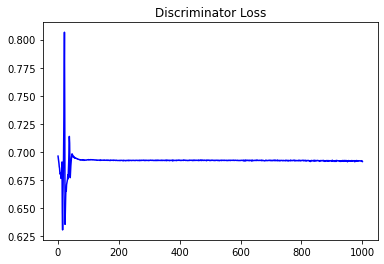

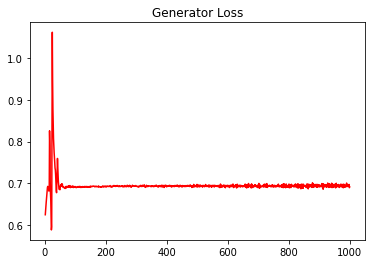

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15345007822539095


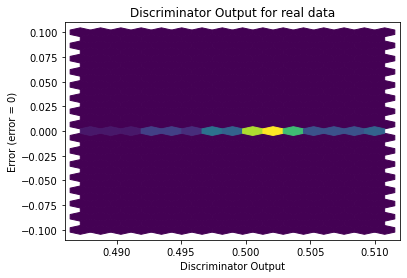

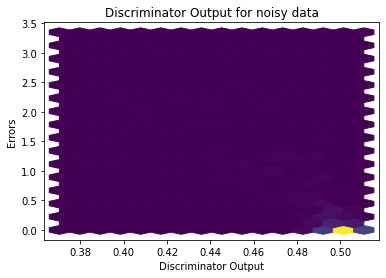

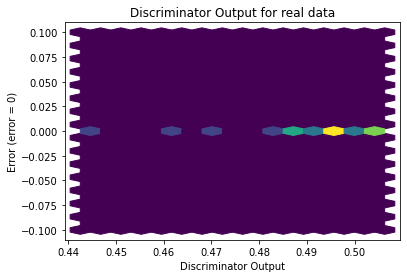

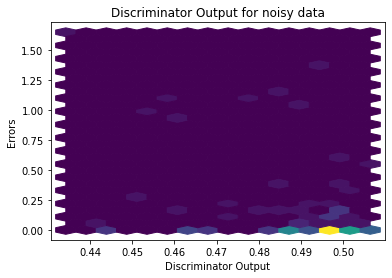

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


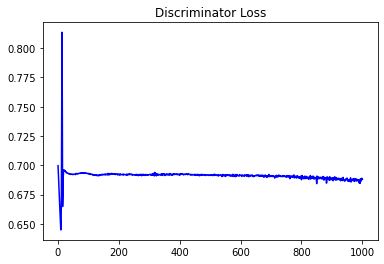

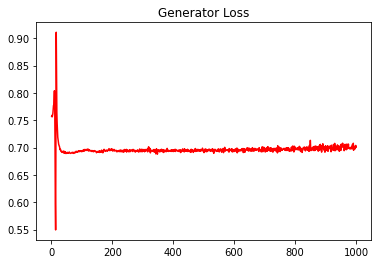

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14348821712173038


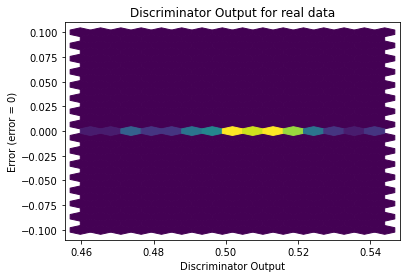

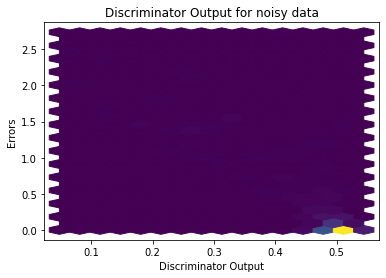

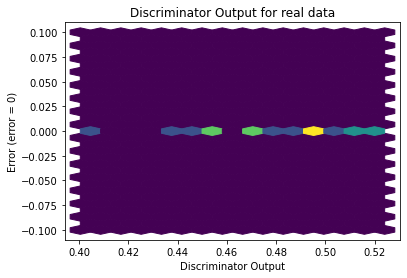

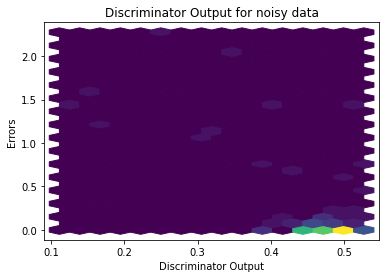

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0875]], requires_grad=True)
